In [5]:
from scipy.integrate import solve_ivp

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

## Solve the ODE

In [9]:
def f(t, U, sigma, r, b):
    x = U[0]
    y = U[1]
    z = U[2]

    x_prime = sigma * (y - x)
    y_prime = r * x - y - x * z
    z_prime = x * y - b * z

    U_prime = np.array([x_prime, y_prime, z_prime])
    return U_prime

In [11]:
sigma = 10
b = 8 / 3
r_list = np.array([0.9, 12, 22, 28])

solution = []

initCond = np.array([0, 1, 0])



for r in r_list:
    sol = solve_ivp(f, [0, 100], initCond, method = 'LSODA', args=(sigma, r, b,))
    solution.append(sol)

In [ ]:
x = np.array()

for i in range(len(r_list)):
    x[i] = solution[i].y[0,:]
    y[i] = solution[i].y[1,:]
    z[i] = solution[i].y[2,:]

In [6]:
params = {
    'figure.figsize'    : [11,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

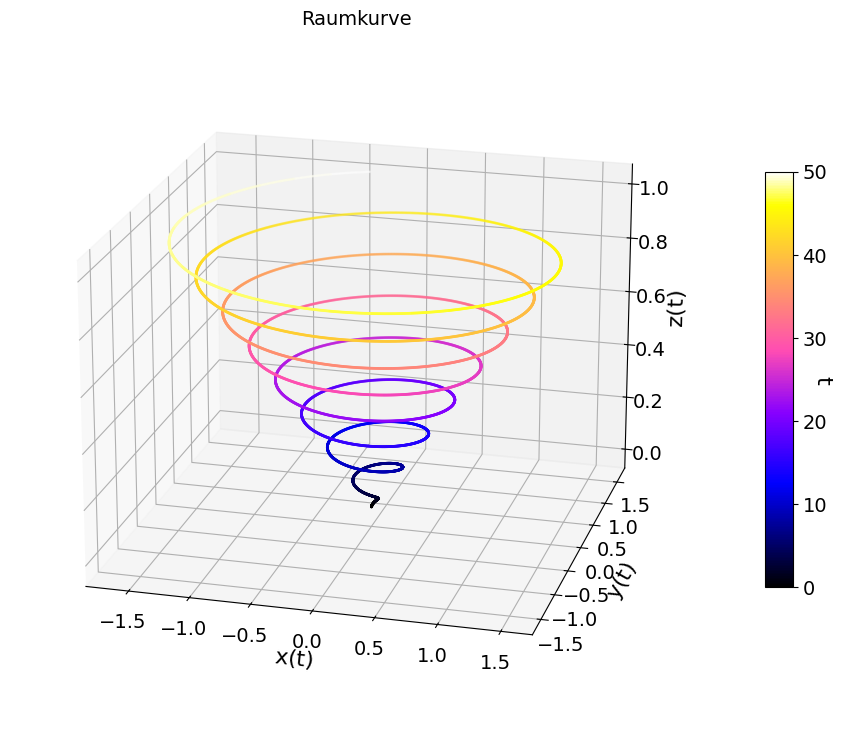

In [8]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(projection='3d')
bild = ax.scatter3D(x,y,z, marker='o', s=1, c = t_val, cmap=matplotlib.cm.gnuplot2)
ax.view_init(azim=-75, elev=20)
cbar = fig.colorbar(bild, shrink=0.6, aspect=15)
cbar.set_label(r"$\rm t$", rotation=270)
plt.title("Raumkurve")
ax.set_xlabel(r"$\rm x(t)$")
ax.set_ylabel(r"$\rm y(t)$")
ax.set_zlabel(r"$\rm z(t)$");

